Sklearn Logistic Regression: 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split


In [6]:
df = pd.read_csv('cleaned_data_final.csv')
#turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,0,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,1,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,1,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,0,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,0,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,0,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,1,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,0,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,1,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)

In [7]:
# Define hyperparameter tuning dictionary
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000]
}

In [9]:
# Create logistic regression model
model = LogisticRegression()

# Perform random search for hyperparameters
search = RandomizedSearchCV(model, params, n_iter=100, cv=5, verbose=3)
search_result = search.fit(X_train, y_train.values.ravel())


/Users/nicolerangan/.conda/envs/LING167/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.555 total time=   0.7s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.558 total time=   0.4s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.560 total time=   0.4s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.555 total time=   0.4s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.557 total time=   0.4s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.555 total time=   5.6s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   5.9s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.561 total time=   6.1s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.554 total time=   6.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.557 total time=   6.0s
[CV

In [10]:
# Get best hyperparameters from search
best_params = search_result.best_params_
print(best_params)

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 1}


In [18]:
# Train logistic regression model with best hyperparameters
model = LogisticRegression(**best_params)
history = model.fit(X_train, y_train.values.ravel())


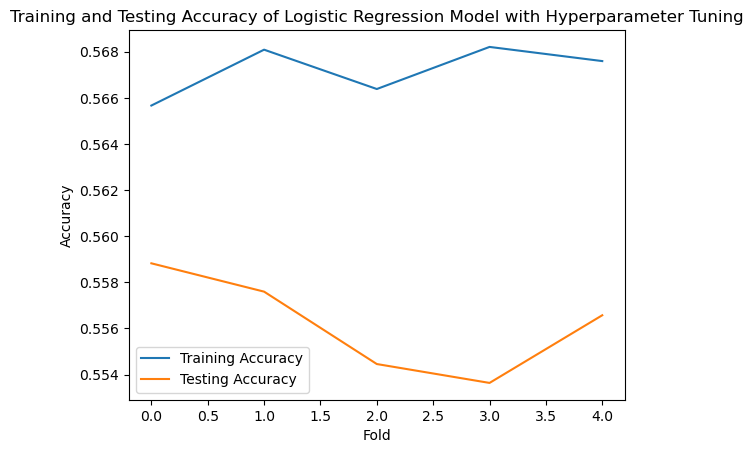

0.5500600502238235
0.5654019380373959


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold

y_pred = model.predict(X_test)

# Calculate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model.predict(X_train))

# Train and test model with K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_acc = []
test_acc = []
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_fold, y_train_fold.values.ravel())
    train_acc.append(accuracy_score(y_train_fold, model.predict(X_train_fold)))
    test_acc.append(accuracy_score(y_test_fold, model.predict(X_test_fold)))



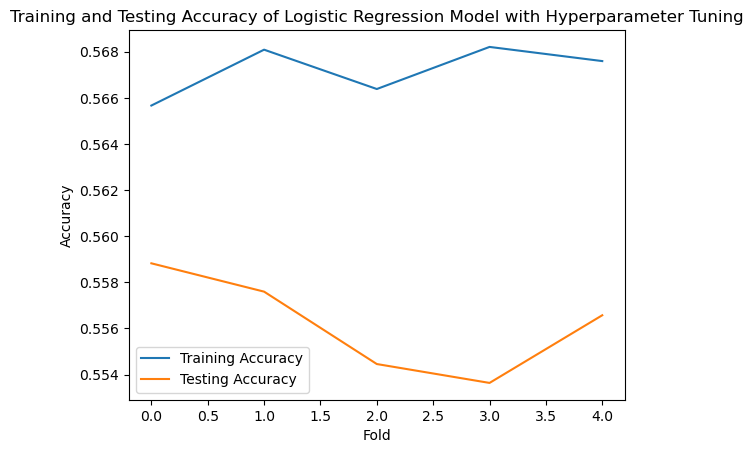

Training accuracy: 0.5654019380373959
Testing accuracy: 0.5500600502238235


In [27]:
# Plot the training and testing accuracy history
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.title('Training and Testing Accuracy of Logistic Regression Model with Hyperparameter Tuning')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)